**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

2
1
4
5

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Reading Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/web_sites_data.csv')
df[1:5]

,text
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


#### Importing Libs


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import re
import sys
import io

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.probability import FreqDist

from nltk import word_tokenize
from nltk.text import ConcordanceIndex
from nltk.corpus import gutenberg
from nltk.text import Text

from bs4 import BeautifulSoup
import nltk 
nltk.download('words')
nltk.download('stopwords')
nltk.download("wordnet")

from sklearn.model_selection import train_test_split
from gensim import corpora
from gensim.models import Nmf, LdaModel, CoherenceModel


words = set(nltk.corpus.words.words())
letter = {'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'}
stopwordssc = stopwords.words("english")
lemmer = WordNetLemmatizer()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pip install --upgrade gensim

#### Copy of the Data

In [ ]:
dfc = df['text']
dfc

0        <html>\n<head profile="http://www.w3.org/2005/...
1        <html>\n<head profile="http://www.w3.org/2005/...
2        <html>\n<head profile="http://www.w3.org/2005/...
3        <html>\n<head profile="http://www.w3.org/2005/...
4        <html>\n<head profile="http://www.w3.org/2005/...
                               ...                        
71694    <?xml version="1.0" encoding="UTF-8"?>\n    \n...
71695    <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...
71696    <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 T...
71697    <?xml version="1.0" encoding="UTF-8"?>\n    \n...
71698    <?xml version="1.0" encoding="UTF-8"?>\n    \n...
Name: text, Length: 71699, dtype: object

#### Removing Tags 

In [ ]:
def remove_tags(input):
  
    # parse html content
    soup = BeautifulSoup(input, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [ ]:
for i in range(len(dfc)):
  dfc[i] = remove_tags(dfc[i])
  # De-hmtl-ization                           !!!!!!!! Takes 45 mins !!!!!!!!!!!

In [ ]:
def interprocessing(indata):
    indata = indata.lower()

    sent = " ".join(w for w in nltk.wordpunct_tokenize(indata) if (w in words) and (w not in letter))

    stopwordsc = stopwords.words("english") #Calling StopWords 
    temptoken = [token for token in sent.split(" ") if token not in stopwordsc] #Clearing Stopwords 

    sent = [lemmer.lemmatize(word) for word in temptoken] #lemmitization

    sent = " ".join(w for w in sent)

    g = re.sub("<.*?>", " ", sent)
    g = re.sub("\n", " ", g)
    g = re.sub("\(", "", g) 
    g = re.sub("\)", "", g)
    g = re.sub(":", "", g)
    g = re.sub(";", "", g)
    g = re.sub("\.", "", g)
    g = re.sub(",", "", g)
    g = re.sub("\"", "", g)
    g = re.sub("~", "", g)
    g = re.sub("-", "", g)
    g = re.sub("_", "", g)
    g = re.sub("\'", "", g)
    g = re.sub("\d+", " ", g)
    g = re.sub('[^\w]', " ", g)
    
    return g

In [ ]:
#post processing Data 
for i in range(len(dfc)):
  dfc[i] = interprocessing(dfc[i])
  

In [ ]:
dfc[5]

'autobiography autobiography author title autobiography available senna versus story deadly rivalry racing driver never saw abridged automotive edition format miscellaneous motor sport nonfiction racing sport sport outdoors unlaunched binding audio date publisher audio edition abridged description product description early struggle fought back broken neck sell house fund racing triumph neck neck like senna still drove book forthrightly fellow well formula winning championship comeback end add save later web related recommend'

In [ ]:
dfccopy = dfc
dfccopy

0        eric love war eric love war author eric title ...
1        eric short walk eric short walk author eric ti...
2        poetry unabridged poetry unabridged author tit...
3        uncle cabin uncle cabin author title uncle cab...
4        consider lily consider lily author title consi...
                               ...                        
71694    donkey march skip donkey march section skip ma...
71695    true crime street la spec game home news guess...
71696    world soccer winning eleven spec game home new...
71697    really rock skip really rock section skip main...
71698    star cheer squad skip star cheer squad section...
Name: text, Length: 71699, dtype: object

#### Converting the Datatype to a standalone list

In [ ]:
hoax = dfccopy.tolist()
hoax[2]

'poetry unabridged poetry unabridged author title poetry unabridged available bin literature fiction poetry poetry drama short unlaunched binding audio date publisher audio weight size description product description selection recording lyrical longer abbey immortality prelude trace development mind add save later web related recommend'

#### Clearing final spaces & prepping for plotting

In [ ]:
# Function to clear spaces + blank lines
def clears(line):
  if "" in line:
    line.remove("")
  return line

In [ ]:
# Words as tokens for frequency 
words = []
for line in hoax:
  words.extend(clears(line.split(" ")))

NameError: ignored

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

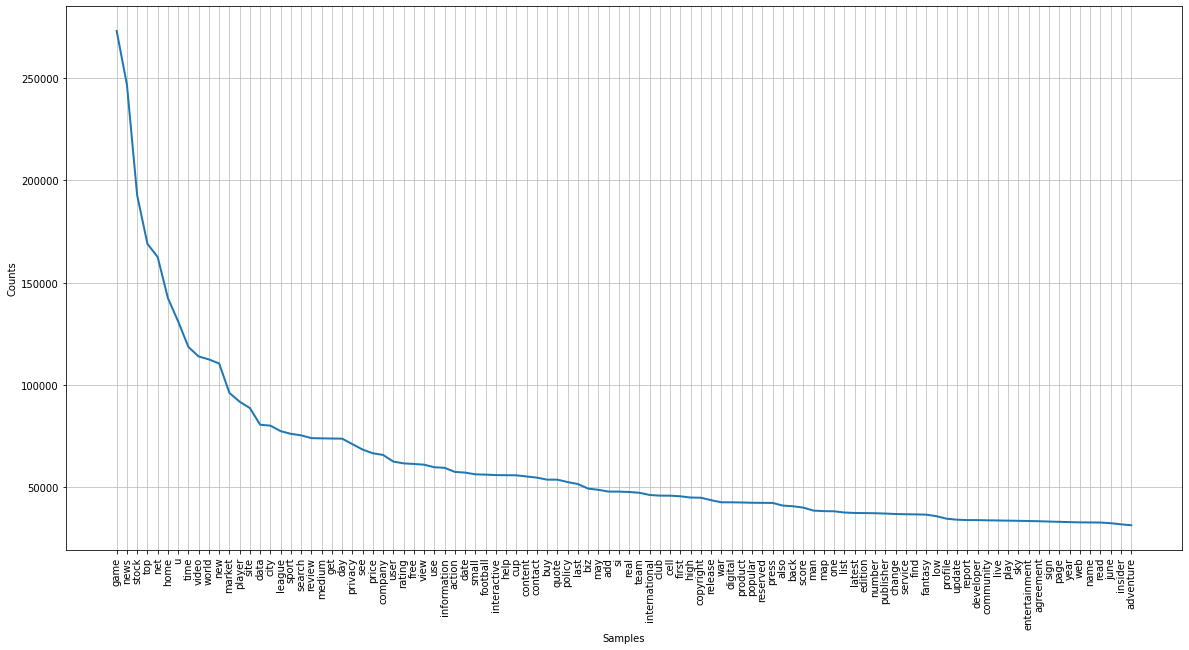

In [ ]:
# Plotting Frequency 
plt.figure(figsize=(20, 10))
fdist = FreqDist(words)
fdist.plot(100)

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

Ans: Most of the examples were cleaned properly, except instances where numbers were used to represent quantity were overlooked and removed without replacement.

In [ ]:
print("Cleaned Data Example")
hoax[1]


Cleaned Data Example


'eric short walk eric short walk author eric title short walk available world dozen bookseller lovely three tea one man mission elegance hedgehog banner heaven story pat parker feminism smith giraffe longitude true story lone five quarter orange show education reference reference travel writing binding audio date publisher audio weight size edition abridged description product description eric also written last grain race slowly love war mediterranean review decade following end world war eric toiled away fashion industry peddling clothes planet regarding one wafer thin model runway best put mall queen come home fortunately end tether point sort sublime impulsiveness forbidden fictional endemic real decided visit remote corner least adventure classic narrative short walk title course fine example habitual self effacement since journey included near ascent foot mir anything short book furnish missing link great era contemporary jungle time also mind waugh preface le acidulous writer sur

# [10 points] Part 2. Duplicates detection. LSH

In [ ]:
tempvar = []
for i in range(10000):
  tempvar.append(hoax[i])


In [ ]:
str1 = ''.join(str(e) for e in tempvar)

In [ ]:
len(str1)

18283894

In [ ]:
str1

In [ ]:
tempvar = []
for i in range(10001,20000):
  tempvar.append(hoax[i])


In [ ]:
str2 = ''.join(str(e) for e in tempvar)

In [ ]:
len(str2)

19202085

In [ ]:
str2

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [ ]:
s1 = str1 
s2 = str2

shingles1 = set([s1[max(0, i-5):i] for i in range(5, len(s1) + 1)]) #Windowing size = 5
shingles2 = set([s2[max(0, i-5):i] for i in range(5, len(s2) + 1)])

print("Similarity Between Set 1 & Set 2 = ", (len(shingles1 & shingles2) / len(shingles1 | shingles2))*100)


Similarity Between Set 1 & Set 2 =  59.76528055761614


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns # makes the graph prettier

s1 = str1
s2 = str2

similarities = []
for shingle_size in range(1, 6):
    shingles1 = set([s1[max(0, i - shingle_size):i] for i in range(shingle_size, len(s1) + 1)])
    shingles2 = set([s2[max(0, i - shingle_size):i] for i in range(shingle_size, len(s2) + 1)])
    equal = len(shingles1 & shingles2) / len(shingles1 | shingles2) #A0B / AUB
    similarities.append(equal)


In [ ]:
similarities

[1.0,
 0.9326424870466321,
 0.8339390109021962,
 0.7087421820708826,
 0.5976528055761614]

Text(0, 0.5, 'Duplicates')

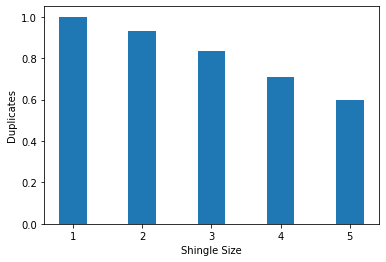

In [ ]:
plt.bar([1,2,3,4,5], similarities, width=0.40)
plt.xlabel('Shingle Size')
plt.title("")
plt.ylabel('Duplicates')

In [ ]:
import time
time.sleep(300)
print("im up")

In [ ]:
#min hashing
def getShingles(str1, K=5):
    d1 = set()
    for i in range(len(str1)-K):
        d1.add(str1[i:i+K])
    print(f"Found {len(d1)} unique shingles, out of {len(str1)} possible.")
    return d1
doc_shingles = [getShingles(s, 5) for s in tempvar[0:100]]

Found 898 unique shingles, out of 1217 possible.
Found 611 unique shingles, out of 801 possible.
Found 611 unique shingles, out of 801 possible.
Found 633 unique shingles, out of 837 possible.
Found 624 unique shingles, out of 825 possible.
Found 745 unique shingles, out of 1036 possible.
Found 611 unique shingles, out of 801 possible.
Found 623 unique shingles, out of 816 possible.
Found 640 unique shingles, out of 832 possible.
Found 789 unique shingles, out of 996 possible.
Found 759 unique shingles, out of 960 possible.
Found 775 unique shingles, out of 999 possible.
Found 627 unique shingles, out of 821 possible.
Found 658 unique shingles, out of 857 possible.
Found 788 unique shingles, out of 1039 possible.
Found 626 unique shingles, out of 819 possible.
Found 733 unique shingles, out of 962 possible.
Found 677 unique shingles, out of 886 possible.
Found 667 unique shingles, out of 868 possible.
Found 621 unique shingles, out of 817 possible.
Found 615 unique shingles, out of 805

In [ ]:
doc_shingles

[{' acro',
  ' addr',
  ' aler',
  ' also',
  ' ask ',
  ' avai',
  ' avid',
  ' back',
  ' bari',
  ' bett',
  ' beyo',
  ' bonu',
  ' born',
  ' care',
  ' carr',
  ' case',
  ' casi',
  ' choo',
  ' club',
  ' coac',
  ' comp',
  ' cond',
  ' cont',
  ' corr',
  ' cup ',
  ' curr',
  ' deci',
  ' dit ',
  ' dob ',
  ' dutc',
  ' extr',
  ' fail',
  ' favo',
  ' feat',
  ' find',
  ' foot',
  ' forg',
  ' form',
  ' free',
  ' get ',
  ' givi',
  ' got ',
  ' grou',
  ' guid',
  ' hatr',
  ' help',
  ' hist',
  ' home',
  ' homo',
  ' huge',
  ' impr',
  ' info',
  ' inpu',
  ' late',
  ' lead',
  ' leag',
  ' lear',
  ' lee ',
  ' link',
  ' list',
  ' log ',
  ' logi',
  ' mana',
  ' memb',
  ' mess',
  ' misc',
  ' move',
  ' name',
  ' nati',
  ' need',
  ' nega',
  ' news',
  ' note',
  ' offi',
  ' opin',
  ' otto',
  ' pass',
  ' pick',
  ' play',
  ' plea',
  ' posi',
  ' pred',
  ' prem',
  ' prof',
  ' prov',
  ' publ',
  ' rapi',
  ' regi',
  ' resp',
  ' resu',
  ' reti',

In [ ]:
fullset = set.union(*doc_shingles)
shingle_dict = dict(zip(list(fullset),range(len(fullset))))
print(f"There are {len(shingle_dict)} shingles")

There are 7445 shingles


In [ ]:
# Create a hash function
# define as a callable class, so that we only
# intialize random functions once
class HashManager():
    def __init__(self, shingle_dict):
        self.shingle_dict = shingle_dict
        self.N = len(shingle_dict)
        self.params = None
        
    def _initParams(self, n_sig):
        self.params = np.random.randint(self.N, size=[n_sig,2])
    
    def _permuteRow(self, row):
        return (self.params@np.array([1,row]))%self.N
    
    def __call__(self, docs, n_sig, init=True):
        # Initialize if we change signature matrix length
        # or if we request to re-initialize
        if self.params is None or len(self.params) != n_sig or init:
            self._initParams(n_sig)
            
        #initialize signature matrix
        sig = np.full((n_sig, len(docs)), np.inf)
        
        # each doc in docs is assumed to be an iterable object
        for j, doc in enumerate(docs):
            for shingle in doc:
                orig_row = shingle_dict[shingle]
                curr_col = self._permuteRow(orig_row)
                sig[:,j] = np.minimum(sig[:,j],curr_col)
        return sig.astype(int)
    
# run some tests:
try:
    print("Initialization test: ", end="")
    hm = HashManager(shingle_dict)
    print("passed")

    print("Set parameters to right size: ", end="")
    hm._initParams(n_sig=4)
    assert(hm.params.shape == (4,2))
    print("passed")

    print("Permuting a row integer returns array: ", end="")
    curr_col = hm._permuteRow(3)
    assert(curr_col.shape == (4,))
    print("passed")

    print("Compute minhashed signature matrix: ", end="")
    hm(doc_shingles, 4)
    print("passed")
except Exception as e:
    print("failure")
    print(e.args)

Initialization test: passed
Set parameters to right size: passed
Permuting a row integer returns array: passed
Compute minhashed signature matrix: passed


In [ ]:
def trueSimScores(doc_shingles):
    pair_labels = []
    pair_sims = []
    idxs = range(len(doc_shingles))
    for x1, x2 in itertools.combinations(zip(idxs,doc_shingles), 2):
        pair_labels.append((x1[0], x2[0]))
        pair_sims.append(jaccardSim(x1[1], x2[1]))
    return dict(zip(pair_labels, pair_sims))
    
def sigSimScores(sig_mat):
#     cols = [sig_mat[:,i] for i in range(sig_mat.shape[1])]
    cols = sig_mat.T
    idxs = range(sig_mat.shape[1])
    
    pair_labels = []
    pair_sims = []
    for (i,col1), (j,col2) in itertools.combinations(zip(idxs, cols),2):
        pair_labels.append((i,j))
        pair_sims.append(np.mean(col1==col2))
    
    return dict(zip(pair_labels, pair_sims))

def printScoreComparison(true_dict, approx_dict):
    print(f"**~~~~~~ Similarity score comparison ~~~~~~**")
    #print("Pair\t\tApprox\t\tTrue\t\t%Error")
    for pair, true_value in true_dict.items():
        approx_value = approx_dict[pair]
        err = 100*abs(true_value-approx_value)/true_value
        #print(f"{pair}\t\t{approx_value:.3f}\t\t{true_value:.3f}\t\t{err:.2f}")

def candidatePairs(score_dict, threshold):
    return set(pair for pair, scr in score_dict.items() if scr>=threshold)

def accMatrix(true_dict, approx_dict, threshold):
    true_pairs = candidatePairs(true_dict, threshold)
    approx_pairs = candidatePairs(approx_dict, threshold)
    false_negatives = len(true_pairs - approx_pairs)
    false_positives = len(approx_pairs - true_pairs)
    print(f"False negatives: {false_negatives}")
    print(f"Potential false positives: {false_positives}")

sig_mat = hm(doc_shingles, 25)
true_score_dict = trueSimScores(doc_shingles)
approx_score_dict = sigSimScores(sig_mat)
printScoreComparison(true_score_dict, approx_score_dict)

print("True pairs:",candidatePairs(true_score_dict, 0.25))
print("Candidate pairs:",candidatePairs(approx_score_dict, 0.25))
accMatrix(true_score_dict, approx_score_dict, 0.4)

**~~~~~~ Similarity score comparison ~~~~~~**
True pairs: {(39, 70), (63, 76), (29, 44), (33, 41), (52, 98), (15, 30), (19, 91), (76, 88), (42, 88), (5, 84), (8, 87), (85, 87), (32, 77), (14, 77), (75, 97), (4, 35), (95, 98), (8, 38), (61, 63), (17, 57), (37, 54), (3, 11), (23, 84), (70, 81), (12, 90), (16, 29), (73, 92), (36, 80), (2, 64), (79, 82), (26, 74), (12, 41), (45, 47), (49, 52), (45, 64), (1, 58), (21, 55), (11, 65), (20, 96), (77, 81), (24, 99), (6, 87), (10, 26), (67, 71), (30, 89), (0, 28), (91, 93), (33, 68), (57, 78), (80, 89), (63, 96), (29, 48), (33, 53), (5, 39), (9, 60), (52, 70), (42, 60), (5, 72), (14, 41), (71, 72), (18, 84), (4, 7), (37, 89), (61, 67), (27, 95), (88, 95), (51, 85), (17, 37), (37, 42), (13, 49), (40, 81), (50, 54), (26, 63), (46, 58), (2, 36), (22, 35), (97, 98), (49, 80), (31, 64), (55, 94), (25, 31), (11, 28), (1, 6), (58, 81), (21, 75), (44, 92), (30, 42), (34, 57), (0, 73), (6, 51), (10, 62), (43, 58), (29, 99), (33, 96), (43, 75), (15, 33), 

In [ ]:
aa = len(candidatePairs(true_score_dict, 0.25))
bb = len(candidatePairs(approx_score_dict, 0.25))

In [ ]:
equal2 = (aa*bb)/(aa+bb) #A0B / AUB
hashing.append(equal2)

In [ ]:
hashcpy = hashing

In [ ]:
hashing

[2475.0, 1550.0, 1438.0, 1435.7499747449237, 1145.5923301375574]

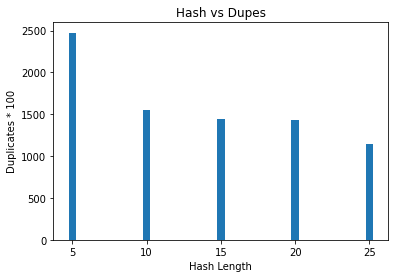

In [ ]:
#plt.figure(figsize=(15, 5))
plt.bar([5,10,15,20,25], hashing, width=0.5)
plt.xlabel("Hash Length")
plt.title("Hash vs Dupes")
plt.ylabel('Duplicates * 100')

plt.show()

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
df[1:5]

,id,text,author
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [ ]:
# Text preprocessing and writing.
for index in range(len(df)):

    df.loc[index, 'processed'] = (interprocessing(remove_tags(df.loc[index, 'text'])))

df.head(10)

,id,text,author,processed
0,id26305,"This process, however, afforded me no means of...",EAP,process however dungeon might make circuit ret...
1,id17569,It never once occurred to me that the fumbling...,HPL,never fumbling might mere mistake
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,left hand gold snuff box hill cutting manner f...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,lovely spring terrace sixteen fertile spread b...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,finding nothing else even gold superintendent ...
5,id22965,"A youth passed in solitude, my best years spen...",MWS,youth solitude best spent gentle feminine fost...
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,astronomer perhaps point took refuge suggestio...
7,id13515,The surcingle hung in ribands from my body.,EAP,surcingle hung body
8,id19322,I knew that you could not say to yourself 'ste...,EAP,knew could say stereotomy without brought thin...
9,id00912,I confess that neither the structure of langua...,MWS,confess neither structure code politics variou...


#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [ ]:
#Coherence
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
#gensim.models.tfidfmodel.TfidfModel(corpus=None, id2word=None, dictionary=None,
#gensim.models.coherencemodel.CoherenceModel(model=None, topics=None, texts=None, corpus=None, dictionary=None,
                                # window_size=None, keyed_vectors=None, coherence='c_v', topn=20, processes=- 1)

def coher(imp, raw_data, dicts):
  cm = CoherenceModel(model = imp, texts = raw_data, dictionary=dicts, coherence='c_v') 
  return cm

In [ ]:
def NormalPMI(imp, raw_data, dicts):
  NPMI = CoherenceModel(model = imp, texts = raw_data, dictionary=dicts, coherence='c_npmi') 
  return NPMI

In [ ]:
def dist(imp, raw_data, dicts):
  rawdist = CoherenceModel(model = imp, texts = raw_data, dictionary=dicts, coherence='c_uci') # C_UCI for pmi 
  return rawdist

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df['processed']
y = df['author']

# Splitting data into train and test parts.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#30%
X_train, y_train = X_train.reset_index(drop=True), y_train.reset_index(drop=True)

In [ ]:
len(X_train)

13705

In [ ]:
len(X_test)

5874

Plot the histogram of resulting tokens counts in the processed datasets.

In [ ]:
hoax2 = X_train.tolist()
hoax2[2]

'breeze headed u fell away dead drifting every direction'

In [ ]:
# Words as tokens for frequency 
words2 = []
for line in hoax2:
  words2.extend(clears(line.split(" ")))

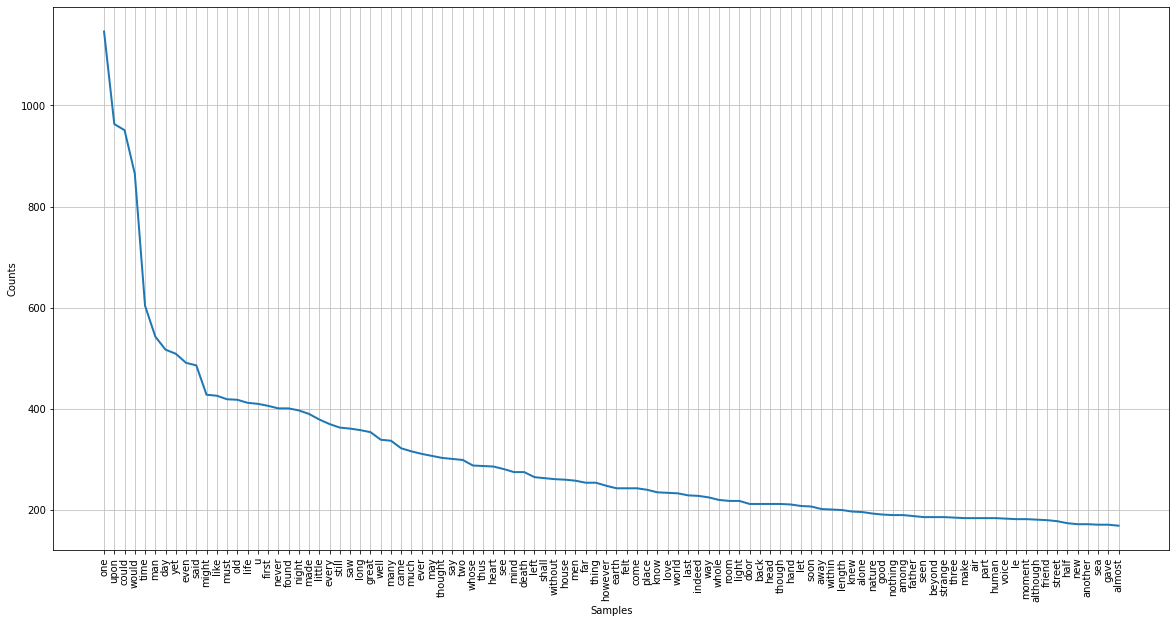

In [ ]:
# Plotting Frequency 
plt.figure(figsize=(20, 10))
fdist = FreqDist(words2)
fdist.plot(100)

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [ ]:
from sklearn.decomposition import NMF
#model = NMF(n_components=2, init='random', random_state=0)

nmf_res = []
for index in range(len(X_train)):
    nmf_res.append(X_train[index].split())

In [ ]:
from gensim.corpora import Dictionary

dtc = corpora.Dictionary(nmf_res)
cors = [dtc.doc2bow(text) for text in nmf_res] # CANCER

In [ ]:
MODEL = Nmf(corpora, num_topics=5, id2word=dtc)
MODEL.print_topics()

[(0,
  '0.016*"day" + 0.014*"man" + 0.013*"u" + 0.011*"old" + 0.010*"said" + 0.008*"even" + 0.008*"must" + 0.006*"first" + 0.005*"let" + 0.005*"thing"'),
 (1,
  '0.061*"could" + 0.017*"might" + 0.010*"yet" + 0.008*"long" + 0.007*"life" + 0.005*"even" + 0.005*"well" + 0.005*"never" + 0.004*"nothing" + 0.004*"thought"'),
 (2,
  '0.050*"would" + 0.008*"night" + 0.007*"room" + 0.007*"found" + 0.006*"men" + 0.005*"world" + 0.005*"thousand" + 0.005*"even" + 0.004*"life" + 0.004*"away"'),
 (3,
  '0.067*"upon" + 0.021*"time" + 0.009*"would" + 0.008*"never" + 0.006*"thus" + 0.005*"little" + 0.005*"shall" + 0.005*"first" + 0.005*"every" + 0.004*"many"'),
 (4,
  '0.076*"one" + 0.006*"every" + 0.005*"yet" + 0.005*"like" + 0.005*"earth" + 0.005*"see" + 0.005*"great" + 0.005*"life" + 0.004*"two" + 0.004*"hundred"')]

In [ ]:
#Metrics
print("Coherence : {:f}".format(coher(MODEL, nmf_res, dtc).get_coherence()))

Coherence : 0.336213


In [ ]:
print("NormalizedPMI : {:f}".format(NormalPMI(MODEL, nmf_res, dtc).get_coherence()))

NormalizedPMI : -0.044480


In [ ]:
print("PMI : {:f}".format(dist(MODEL, nmf_res, dtc).get_coherence()))

PMI : -0.806274


#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [ ]:
MODELLDA= Nmf(corpora, num_topics=5, id2word=dtc)
MODELLDA.print_topics()

[(0,
  '0.091*"one" + 0.025*"would" + 0.006*"found" + 0.005*"thousand" + 0.005*"night" + 0.005*"see" + 0.004*"life" + 0.004*"hundred" + 0.004*"man" + 0.004*"away"'),
 (1,
  '0.064*"upon" + 0.019*"could" + 0.014*"day" + 0.008*"would" + 0.008*"night" + 0.005*"little" + 0.004*"still" + 0.004*"every" + 0.004*"long" + 0.004*"first"'),
 (2,
  '0.017*"man" + 0.013*"must" + 0.012*"old" + 0.011*"could" + 0.010*"great" + 0.010*"yet" + 0.009*"like" + 0.009*"said" + 0.008*"long" + 0.008*"much"'),
 (3,
  '0.017*"saw" + 0.016*"u" + 0.012*"never" + 0.011*"thought" + 0.010*"yet" + 0.008*"found" + 0.008*"shall" + 0.008*"little" + 0.007*"even" + 0.007*"earth"'),
 (4,
  '0.025*"time" + 0.015*"ever" + 0.012*"would" + 0.011*"may" + 0.011*"might" + 0.010*"many" + 0.007*"could" + 0.007*"even" + 0.007*"mind" + 0.007*"like"')]

In [ ]:
#Metrics
print("LDA Coherence : {:f}".format(coher(MODELLDA, nmf_res, dtc).get_coherence()))

LDA Coherence : 0.323716


In [ ]:
print("LDA NormalizedPMI : {:f}".format(NormalPMI(MODELLDA, nmf_res, dtc).get_coherence()))

LDA NormalizedPMI : -0.045268


In [ ]:
print("LDA PMI : {:f}".format(dist(MODELLDA, nmf_res, dtc).get_coherence()))

LDA PMI : -0.884817


### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

In [ ]:
!pip install git+https://github.com/machine-intelligence-laboratory/TopicNet

  Cloning https://github.com/machine-intelligence-laboratory/TopicNet to /tmp/pip-req-build-rvj4jxt4
  Running command git clone -q https://github.com/machine-intelligence-laboratory/TopicNet /tmp/pip-req-build-rvj4jxt4
     |████████████████████████████████| 1.9 MB 4.3 MB/s 
     |████████████████████████████████| 137 kB 60.0 MB/s 
     |████████████████████████████████| 136 kB 42.2 MB/s 
  Created wheel for topicnet: filename=topicnet-0.8.0-py3-none-any.whl size=135623 sha256=b0addcf1664d45341643e15d5208d3a57d2a0f1367a5f55c69e335aff2c19387
  Stored in directory: /tmp/pip-ephem-wheel-cache-uwn7mucu/wheels/da/24/3e/f0cce54058210591030740d17d8f265490e5fe882292fb856f
  Created wheel for strictyaml: filename=strictyaml-1.6.1-py3-none-any.whl size=123931 sha256=c9642777e6900c742a34080a90b7a65a7e423bbb3a155c2e9767b2d0b76561cd
  Stored in directory: /root/.cache/pip/wheels/3e/7f/3a/d36577e71e78a8e7f89a6a263c03dd39e3f876e74d1ebb051b
Successfully built topicnet strictyaml


Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

In [ ]:
from topicnet.cooking_machine.config_parser import build_experiment_environment_from_yaml_config
from topicnet.cooking_machine.recipes import ARTM_baseline as config_string
from dataclasses import dataclass

In [ ]:
enter = df

In [ ]:
from topicnet.cooking_machine.model_constructor import init_simple_default_model

artm_model = init_simple_default_model(
    dataset=X_train,
    modalities_to_use={'@lemmatized': 1.0, '@bigram':0.5},
    main_modality='@lemmatized',
    specific_topics=14,
    background_topics=1,
)

AttributeError: ignored

In [ ]:
from topicnet.cooking_machine.models.base_score import BaseScore


class CustomScore(BaseScore):
    def __init__(self):
        super().__init__()

    def call(self,
             model,
             eps=1e-5,
             n_specific_topics=14):

        phi = model.get_phi().values[:,:n_specific_topics]
        specific_sparsity = np.sum(phi < eps) / np.sum(phi < 1)

        return specific_sparsity

In [ ]:
from topicnet.cooking_machine.models.topic_model import TopicModel


custom_scores = {'SpecificSparsity': CustomScore()}
topic_model = TopicModel(artm_model, model_id='Groot', custom_scores=custom_scores)

Write a function to convert new documents to topics probabilities vectors.

In [ ]:
from topicnet.viewers import TopTokensViewer


toptok_viewer = TopTokensViewer(artm_model, num_top_tokens=10, method='phi')
toptok_viewer.view_from_jupyter()

## I lost it....

Calculate the quality scores for each model. Make a barplot to compare the quality.

In [ ]:
plt.
plt.title()
plt.xlabel()
plt.ylabel()